## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], pre_activate=False):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            if pre_activate:
                x = BatchNormalization()(x)
                x = Activation("relu")(x)
            else:
                x = Activation("relu")(x)
                x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            if pre_activate:
                x = Activation("relu")(x)
                x = BatchNormalization()(x)
            else:
                x = BatchNormalization()(x)
                x = Activation("relu")(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128]
MOMENTUM = 0.95

In [8]:
results = {}
"""
Write your training loop and record results
"""
for batch_size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    exp_name_tag = ("exp-%s" % (batch_size))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
__________

50000/50000 [==============================] - 238s 5ms/step - loss: 2.2535 - acc: 0.1508 - val_loss: 2.2600 - val_acc: 0.1441
Epoch 47/50
50000/50000 [==============================] - 240s 5ms/step - loss: 2.2528 - acc: 0.1490 - val_loss: 2.2473 - val_acc: 0.1463
Epoch 48/50
50000/50000 [==============================] - 240s 5ms/step - loss: 2.2515 - acc: 0.1488 - val_loss: 2.2573 - val_acc: 0.1488
Epoch 49/50
50000/50000 [==============================] - 260s 5ms/step - loss: 2.2625 - acc: 0.1414 - val_loss: 2.2382 - val_acc: 0.1534
Epoch 50/50
50000/50000 [==============================] - 302s 6ms/step - loss: 2.2624 - acc: 0.1418 - val_loss: 2.2536 - val_acc: 0.1409
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)             

50000/50000 [==============================] - 35s 708us/step - loss: 1.0788 - acc: 0.6159 - val_loss: 1.4074 - val_acc: 0.5112
Epoch 42/50
50000/50000 [==============================] - 35s 707us/step - loss: 1.0810 - acc: 0.6143 - val_loss: 1.3400 - val_acc: 0.5377
Epoch 43/50
50000/50000 [==============================] - 36s 713us/step - loss: 1.0689 - acc: 0.6200 - val_loss: 1.3798 - val_acc: 0.5201
Epoch 44/50
50000/50000 [==============================] - 35s 710us/step - loss: 1.0654 - acc: 0.6243 - val_loss: 1.4291 - val_acc: 0.5106
Epoch 45/50
50000/50000 [==============================] - 35s 708us/step - loss: 1.0527 - acc: 0.6233 - val_loss: 1.3996 - val_acc: 0.5208
Epoch 46/50
50000/50000 [==============================] - 35s 709us/step - loss: 1.0585 - acc: 0.6230 - val_loss: 1.3472 - val_acc: 0.5379
Epoch 47/50
50000/50000 [==============================] - 35s 708us/step - loss: 1.0513 - acc: 0.6265 - val_loss: 1.3463 - val_acc: 0.5392
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 17s 346us/step - loss: 0.8753 - acc: 0.6862 - val_loss: 1.5178 - val_acc: 0.4999
Epoch 37/50
50000/50000 [==============================] - 17s 345us/step - loss: 0.8499 - acc: 0.6975 - val_loss: 1.5090 - val_acc: 0.5122
Epoch 38/50
50000/50000 [==============================] - 18s 352us/step - loss: 0.8398 - acc: 0.6999 - val_loss: 1.5722 - val_acc: 0.4988
Epoch 39/50
50000/50000 [==============================] - 17s 343us/step - loss: 0.8296 - acc: 0.7043 - val_loss: 1.5229 - val_acc: 0.5156
Epoch 40/50
50000/50000 [==============================] - 17s 345us/step - loss: 0.8204 - acc: 0.7064 - val_loss: 1.5449 - val_acc: 0.5070
Epoch 41/50
50000/50000 [==============================] - 17s 344us/step - loss: 0.8082 - acc: 0.7105 - val_loss: 1.5428 - val_acc: 0.5068
Epoch 42/50
50000/50000 [==============================] - 17s 345us/step - loss: 0.8027 - acc: 0.7123 - val_loss: 1.6041 - val_acc: 0.4933
Epoch 43/50
50000/50000 [=======

Epoch 32/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.5298 - acc: 0.8171 - val_loss: 1.8539 - val_acc: 0.4770
Epoch 33/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.5109 - acc: 0.8255 - val_loss: 1.9901 - val_acc: 0.4487
Epoch 34/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.4944 - acc: 0.8316 - val_loss: 1.8716 - val_acc: 0.4737
Epoch 35/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.4662 - acc: 0.8420 - val_loss: 1.9057 - val_acc: 0.4703
Epoch 36/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.4561 - acc: 0.8457 - val_loss: 1.9592 - val_acc: 0.4751
Epoch 37/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.4408 - acc: 0.8512 - val_loss: 2.0585 - val_acc: 0.4527
Epoch 38/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.4202 - acc: 0.8586 - val_loss: 2.0989 - val_acc: 0.4570
Epoch 39/50
50000/50000 [==

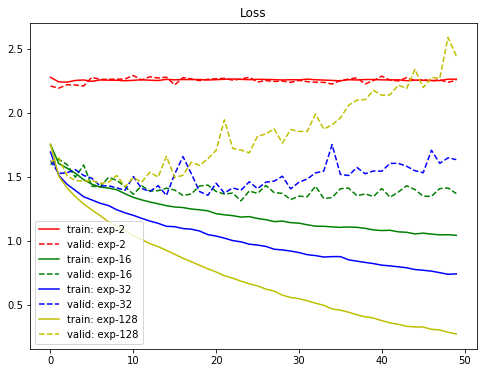

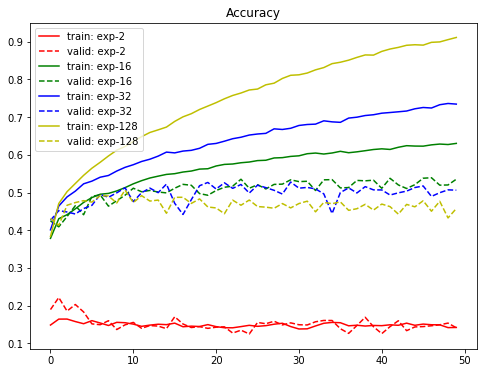

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
Plot results
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()